In [1]:
import pandas as pd
import numpy as np
import re
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Fetching Dataset

In [2]:
df = pd.read_csv('trainData.csv', encoding='latin1')
acc_df = df.replace(np.nan, '', regex=True)
acc_df

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,1.638039e+08,"""163803902""","""1lovetakes2""","""""","""""",null,0,9,0,"""Wed Jul 07 09:25:23 +0000 2010""",0,False,0,"""en""",,True,True,False,"""Camisha""",1
1,7.710000e+17,"""771193200367108100""","""1pRsHsia8WbmoD7""","""""","""33""",null,4,102,0,"""Thu Sep 01 03:49:21 +0000 2016""",2,False,0,"""en""",,True,False,True,"""___""",1
2,7.710000e+17,"""770720756242219009""","""3461holley""","""""","""""",null,6,109,0,"""Tue Aug 30 20:32:02 +0000 2016""",0,False,2,"""en""","{\r ""created_at"": ""Fri Mar 10 20:50:14 +0...",True,True,False,"""1 347-615-3461holley""",1
3,8.170000e+17,"""817153087701778432""","""817153087701778432""","""""","""Providing Tweets of the rarest and rare battl...","""https://t.co/ZxOnj75YEd""",828,13,18,"""Thu Jan 05 23:37:32 +0000 2017""",6,False,19596,"""en""","{\r ""created_at"": ""Sun Mar 12 15:57:28 +0...",True,False,False,"""PoGo Chula Vista""",1
4,1.957370e+08,"""195737016""","""alertmessages""","""UK""","""The Neighbourhood Alert system is a secure co...","""https://t.co/uZthY9IuTu""",43869,4786,69,"""Mon Sep 27 13:20:10 +0000 2010""",125,False,120082,"""en""","{\r ""created_at"": ""Sun Mar 12 15:54:28 +0...",False,False,False,"""Neighbourhood Alert""",1
5,2.601769e+09,"""2601769076""","""AmishFarmHouse""","""Lancaster, PA""","""We invite you to visit the Amish Farm and Hou...","""https://t.co/WjamPqMqN4""",119,165,5,"""Thu Jul 03 14:40:22 +0000 2014""",22,False,115,"""en""","{\r ""created_at"": ""Wed Feb 22 12:19:22 +0...",False,False,False,"""Amish Farm and House""",0
6,2.790222e+09,"""2790221535""","""AnayaJarrett""","""""","""""",null,3,21,0,"""Sun Sep 28 23:51:04 +0000 2014""",0,False,0,"""en""",,True,True,False,"""kassanj""",1
7,2.412432e+09,"""2412432132""","""Attack_On_Tita4""","""""","""Attack on titan The Best. you didn't know The...",null,567,0,2,"""Wed Mar 26 11:02:49 +0000 2014""",0,False,16733,"""ja""","{\r ""created_at"": ""Sun Mar 12 14:23:47 +0...",False,False,False,"""Attack On Titan Best""",1
8,7.077695e+08,"""707769469""","""AutoFollowPeeps""","""All over the world""","""Follow and tweet us, follow our followers and...","""http://t.co/y7kpts3UvR""",10832,2673,42,"""Fri Jul 20 20:41:13 +0000 2012""",2413,False,34971,"""en""","{\r ""created_at"": ""Sun Mar 12 21:49:34 +0...",False,False,False,"""Team AutoFollow Back""",1
9,1.120438e+09,"""1120437522""","""Axelcarp230""","""""","""Nothing is just Nothing""",null,70,354,8,"""Fri Jan 25 22:56:25 +0000 2013""",60,False,5074,"""es""","{\r ""created_at"": ""Sun Mar 12 03:24:05 +0...",False,False,False,"""Axel Carp""",0


# Cleaning Function

In [3]:
def cleanData(acc_df):
    #Set screen_name = 1 if screen_name contains bot
    acc_df_screen_name = pd.DataFrame(acc_df['screen_name'])
    acc_df_screen_name_lower = acc_df_screen_name['screen_name'].str.lower()
    acc_df['screen_name']=acc_df_screen_name_lower.str.contains('bot')*1
    print('screen_name cleaned')

    #Set location = 1 if location is blank
    acc_df['location']=[(((acc_df.iloc[i]['location']=='""')==True)*1) for i in range (len(acc_df))]
    print('location cleaned')
    #acc_df

    # Set description = 1 if it contains words like bot, robot, artificial, intelligence, neural, network,  etc
    words=['bot','robot', 'artificial', 'intelligence', 'neural', 'network','automatic'] #words to be searched in the description
    pat = '|'.join(map(re.escape, words)) #mapping function
    acc_df['description'] = acc_df['description'].str.lower() #converting string to lower case
    acc_df['description']=acc_df.description.str.contains(pat)*1 
    print('description cleaned')
    #acc_df

    #set verified =1 if the account is not verified
    acc_df['verified'] = [(acc_df.iloc[i]['verified']==False)*1 for i in range (0,len(acc_df))]
    print('verfied cleaned')
    #acc_df['verified']

    #set default_profile =1 if the account has a default_profile
    acc_df['default_profile'] = [(acc_df.iloc[i]['default_profile']==True)*1 for i in range (0,len(acc_df))]
    print('default_profile cleaned')
    #acc_df

    #set default_profile_image =1 if the account has a default_profile_image
    acc_df['default_profile_image'] = [(acc_df.iloc[i]['default_profile_image']==True)*1 for i in range (0,len(acc_df))]
    print('default_profile_image cleaned')
    #acc_df

    #set has_extended_profile =1 if the account does not have a has_extended_profile
    acc_df['has_extended_profile'] = [(acc_df.iloc[i]['has_extended_profile']==False)*1 for i in range (0,len(acc_df))]
    print('has_extended_profile cleaned')
    #acc_df

    #set bot =1 if the account is a bot account
    acc_df['bot'] = [(acc_df.iloc[i]['bot']==True)*1 for i in range (0,len(acc_df))]
    print('bot cleaned')
    #acc_df

    #converting dataframe column
    acc_df = acc_df.filter(['screen_name','location','description','followers_count','listed_count','favourites_count','verified','statuses_count','default_profile','default_profile_image','has_extended_profile','bot'], axis=1)
    header_value = acc_df.columns.values
    for header_name in header_value:
        acc_df[header_name]=acc_df[header_name].astype(int)
    #print (acc_df)
    #acc_df
    
    acc_df = acc_df.filter(['screen_name','location','description','followers_count','listed_count','favourites_count','verified','statuses_count','default_profile','default_profile_image','has_extended_profile','bot'], axis=1)
    return acc_df
    

In [4]:
acc_df=cleanData(acc_df) #calling cleaning function
acc_df

screen_name cleaned
location cleaned
description cleaned
verfied cleaned
default_profile cleaned
default_profile_image cleaned
has_extended_profile cleaned
bot cleaned


,screen_name,location,description,followers_count,listed_count,favourites_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile,bot
0,0,1,0,0,0,0,1,0,1,1,1,1
1,0,1,0,4,0,2,1,0,1,0,0,1
2,0,1,0,6,0,0,1,2,1,1,1,1
3,0,1,0,828,18,6,1,19596,1,0,1,1
4,0,0,0,43869,69,125,1,120082,0,0,1,1
5,0,0,0,119,5,22,1,115,0,0,1,0
6,0,1,0,3,0,0,1,0,1,1,1,1
7,0,1,0,567,2,0,1,16733,0,0,1,1
8,0,0,0,10832,42,2413,1,34971,0,0,1,1
9,0,1,0,70,8,60,1,5074,0,0,1,0


# Splitting Dataset

In [5]:
# create design matrix X and target vector y
X = np.array(acc_df.ix[:, 0:len(acc_df.columns)-1]) 	# end index is exclusive
y = np.array(acc_df['bot']) 	# another way of indexing a pandas df

# spliting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1785, 11), (447, 11), (1785,), (447,))

# Fitting K-NN Model

In [6]:
neighbor = list(range(1,51))
roc_auc=list()
for i in neighbor:
    knn = KNeighborsClassifier(n_neighbors=i)
    pred = knn.fit(X_train, y_train).predict(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
    roc_auc.append(metrics.auc(fpr, tpr))

# Plotting Neighbor vs AUC Score

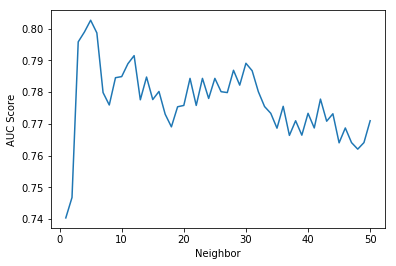

In [7]:
plt.plot(neighbor, roc_auc)
plt.xlabel('Neighbor')
plt.ylabel('AUC Score')
plt.show()

# Refitting Model

In [8]:
knn = KNeighborsClassifier(n_neighbors=neighbor[roc_auc.index(max(roc_auc))])
pred = knn.fit(X_train, y_train).predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc=metrics.auc(fpr, tpr)

# Results

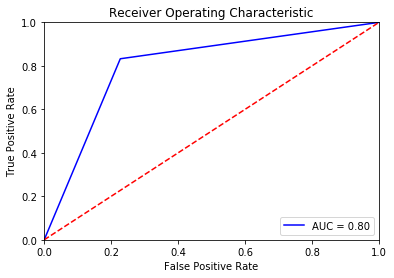

             precision    recall  f1-score   support

          0       0.82      0.77      0.79       220
          1       0.79      0.83      0.81       227

avg / total       0.80      0.80      0.80       447



In [9]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print(classification_report(y_test, pred))